In [33]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
filename = "Data/Irradiance_39.xlsx"

# read data from excel file, and from columns A to E
df = pd.read_excel(filename, index_col=0, usecols="A:E")

# drop the "Ghi Prev Day" column
df.drop("Ghi Prev Day", axis=1, inplace=True)

# group the data by season and separate them into different dataframes
df_1 = df[df["Season"] == 1]
df_2 = df[df["Season"] == 2]
df_3 = df[df["Season"] == 3]

# drop the "Season" column
df_1.drop("Season", axis=1, inplace=True)
df_2.drop("Season", axis=1, inplace=True)
df_3.drop("Season", axis=1, inplace=True)

/var/folders/4f/ll38rx255klcxftt254q2vwh0000gn/T/ipykernel_6150/1446824046.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop("Season", axis=1, inplace=True)
/var/folders/4f/ll38rx255klcxftt254q2vwh0000gn/T/ipykernel_6150/1446824046.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop("Season", axis=1, inplace=True)
/var/folders/4f/ll38rx255klcxftt254q2vwh0000gn/T/ipykernel_6150/1446824046.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [60]:
max(df["Ghi Curr Day"])

1043

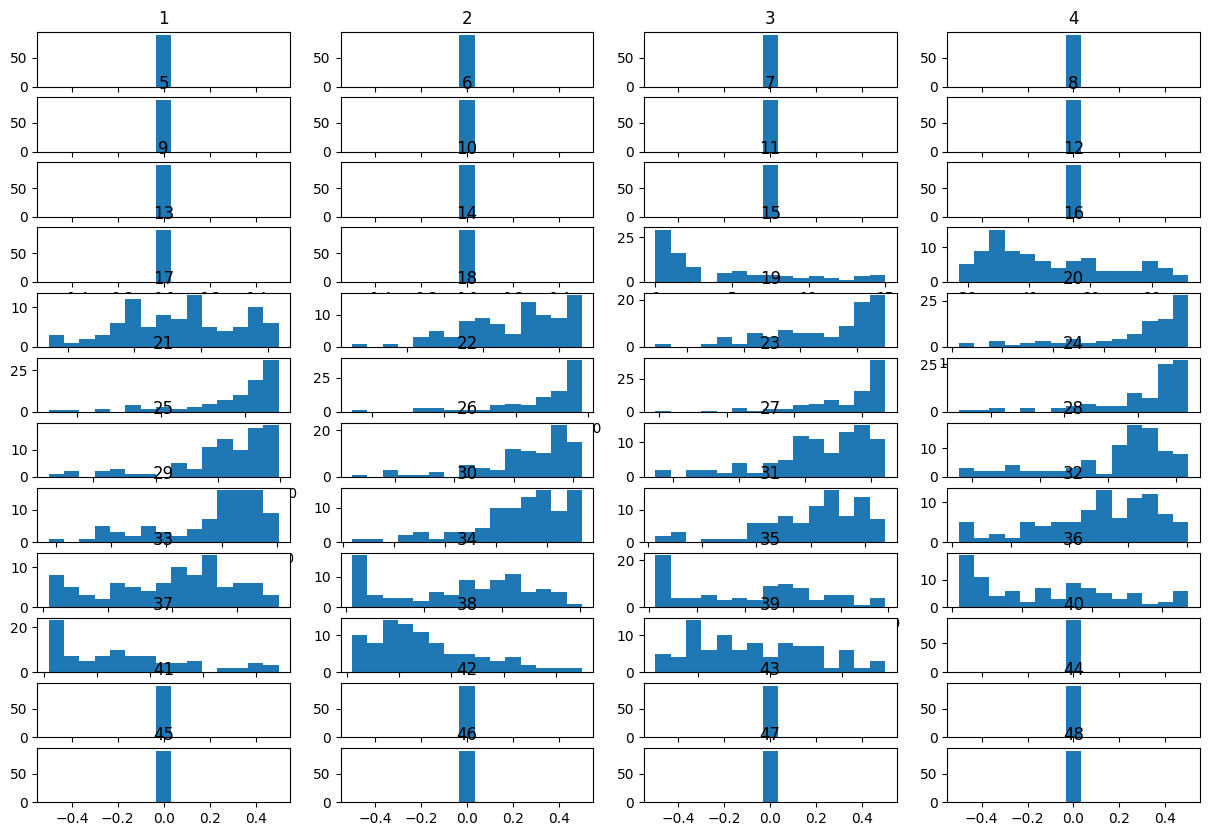

In [35]:
# groupby df_1 by "Time" and plot histogram of every group in subplots
fig, axes = plt.subplots(12, 4, figsize=(15, 10))
for i, (name, group) in enumerate(df_1.groupby("Time")):
    ax = axes[i // 4, i % 4]
    ax.hist(group["Ghi Curr Day"], bins=15)
    ax.set_title(name)
    


In [66]:
scipy.special.beta(1, 1)

1.0

In [67]:
#  define a beta distribution pdf with four parameters
def beta(x, a, b, c, d):
    return (x - c) ** (a - 1) * (d - x) ** (b - 1) / scipy.special.beta(a, b)

def bimodal_beta(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return beta(x,a1,b1,c1,d1) + beta(x,a2,b2,c2,d2)

/opt/homebrew/Caskroom/miniforge/base/envs/me555/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


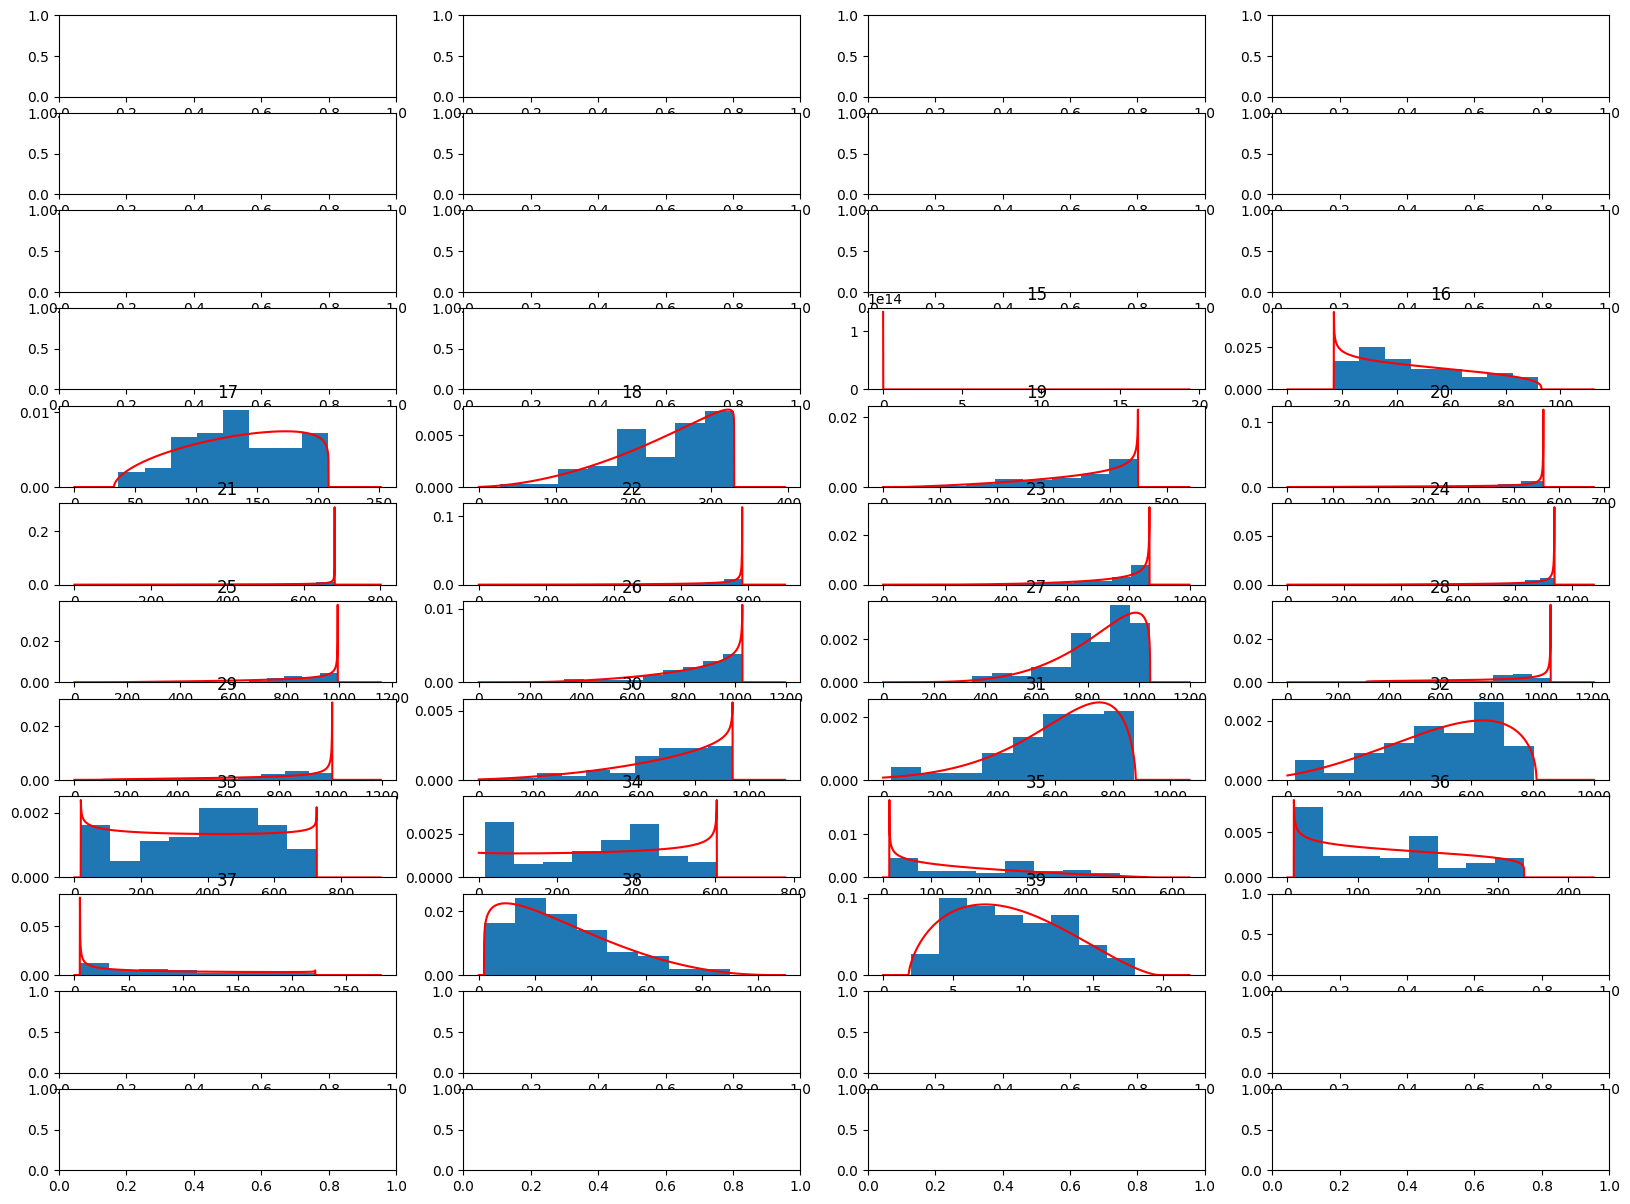

In [93]:
#  for each group, fit a beta distribution to the data
#  and plot the fitted distribution on top of the histogram
#  for each group
fig, axes = plt.subplots(12, 4, figsize=(20, 15))
for i, (name, group) in enumerate(df_1.groupby("Time")):
    # clear a, b , loc, scale
    a, b, loc, scale = None, None, None, None
    ax = axes[i // 4, i % 4]
    max_x = max(group["Ghi Curr Day"])
    std_x = np.std(group["Ghi Curr Day"])
    x = np.linspace(0, max_x + 1*std_x, 2000)
    # if the group contains only zeros, skip it
    if group["Ghi Curr Day"].sum() > 0:
        # fit a beta distribution to the data
        
        # plot histogram normalized to 1
        ax.hist(group["Ghi Curr Day"], bins='auto', density=True)

        # x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

        a, b, loc, scale = scipy.stats.beta.fit(group["Ghi Curr Day"])
        
        # plot the fitted distribution normalized in the y axis
        ax.plot(x, scipy.stats.beta.pdf(x, a, b, loc, scale), color="red")
        ax.set_title(name)
    
    

In [ ]:
# for each dataframe, group by Time and calculate the mean and std of the irradiance, with flat index
df_1_agg = df_1.groupby("Time").agg(["mean", "std"])    
df_2_agg = df_2.groupby("Time").agg(["mean", "std"])
df_3_agg = df_3.groupby("Time").agg(["mean", "std"])

# rename column names with flat index
df_1_agg.columns = ["_".join(x) for x in df_1_agg.columns.to_flat_index()]
df_2_agg.columns = ["_".join(x) for x in df_2_agg.columns.to_flat_index()]
df_3_agg.columns = ["_".join(x) for x in df_3_agg.columns.to_flat_index()]